# Customer Service Discord Bot with Agentic RAG

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1C0ew2B3gn3BGJs9PMfa79CUGdXCICO_v?usp=sharing)

⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)

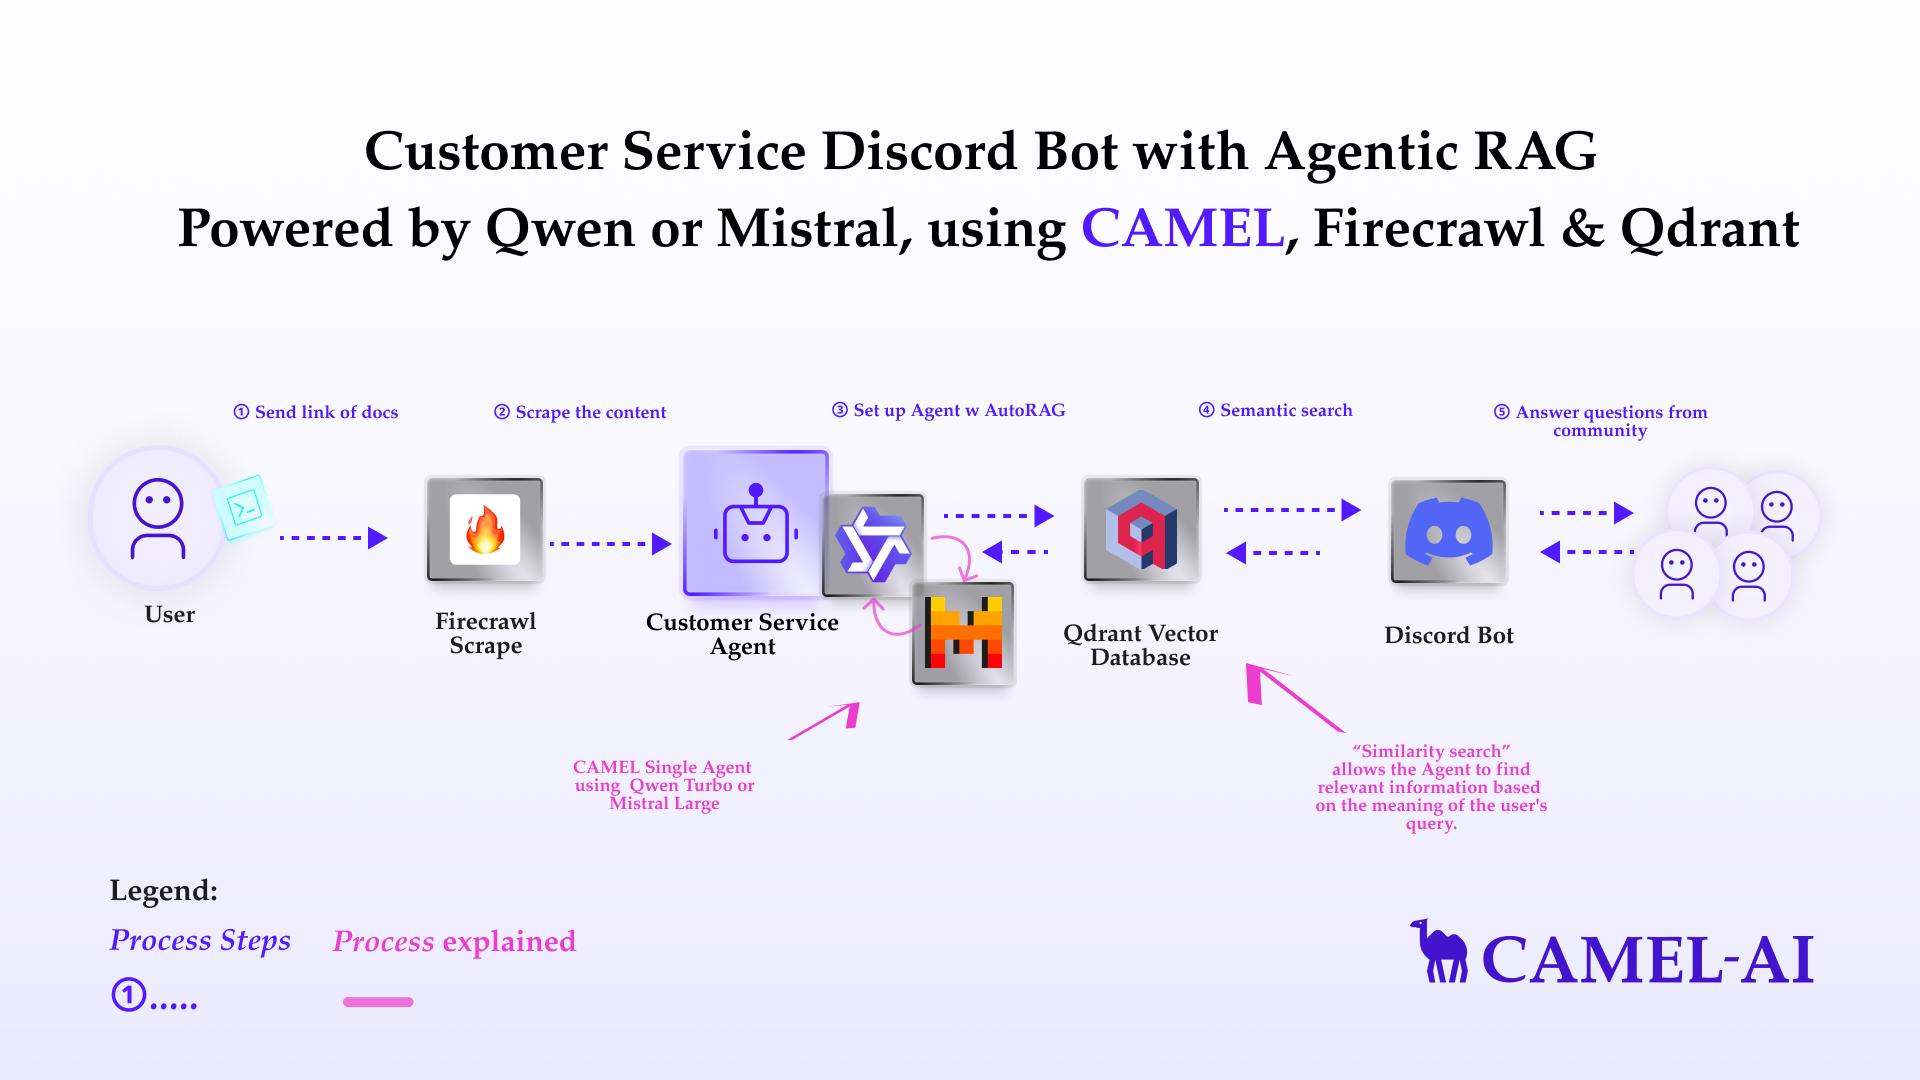

## Installation and Setup
First, install the CAMEL package with all its dependencies

In [ ]:
!pip install "camel-ai[all]==0.2.16"
!pip install starlette
!pip install nest_asyncio

Next, set up your API keys for Firecrawl and the model (Qwen or Mistral)

If you don't have a FireCrawl API key, you can obtain one by following these steps:

1. Visit the FireCrawl API Key page https://www.firecrawl.dev/app/api-keys

2. Log in or sign up for a FireCrawl account.

3. Navigate to the 'API Keys' section.

4. Click on 'Create API Key' button to generate a new API key.

For more details, you can also check the Firecrawl documentation: https://docs.firecrawl.dev/api-reference/introduction

In [ ]:
import os
from getpass import getpass

firecrawl_api_key = getpass('Enter your API key: ')
os.environ["FIRECRAWL_API_KEY"] = firecrawl_api_key

Enter your API key: ··········


If you want to choose Mistral as the model, skip below part for Qwen.

If you don't have a Qwen API key, you can obtain one by following these steps:

1. Visit the Alibaba Cloud Model Studio Console (https://www.alibabacloud.com/en?_p_lc=1) and follow the on-screen instructions to activate the model services.

2. In the upper-right corner of the console, click on your account name and select API-KEY.

3. On the API Key management page, click on the Create API Key button to generate a new key.

For more details, you can also check the Qwen documentation: https://www.alibabacloud.com/help/en/model-studio/developer-reference/use-qwen-by-calling-api

In [ ]:
import os
from getpass import getpass

qwen_api_key = getpass('Enter your API key: ')
os.environ["QWEN_API_KEY"] = qwen_api_key

Enter your API key: ··········


Alternatively, use Mistral.

If you don't have a Mistral API key, you can obtain one by following these steps:

1. Visit the Mistral Console (https://console.mistral.ai/)

2. In the left panel, click on API keys under API section

3. Choose your plan

For more details, you can also check the Mistral documentation: https://docs.mistral.ai/getting-started/quickstart/

In [ ]:
mistral_api_key = getpass('Enter your API key')
os.environ["MISTRAL_API_KEY"] = mistral_api_key

Enter your API key··········


Alternatively, if running on Colab, you could save your API keys and tokens as **Colab Secrets**, and use them across notebooks.

To do so, **comment out** the above **manual** API key prompt code block(s), and **uncomment** the following codeblock.

⚠️ Don't forget granting access to the API key you would be using to the current notebook.

In [ ]:
# import os
# from google.colab import userdata

# os.environ["FIRECRAWL_API_KEY"] = userdata.get("FIRECRAWL_API_KEY")
# os.environ["QWEN_API_KEY"] = userdata.get("QWEN_API_KEY")
# os.environ["MISTRAL_API_KEY"] = userdata.get("MISTRAL_API_KEY")

## Knowledge Crawling and Storage

Use Firecrawl to crawl a website and store the content in a markdown file:

In [ ]:
import os
from camel.loaders import Firecrawl

os.makedirs('local_data', exist_ok=True)

firecrawl = Firecrawl()

knowledge = firecrawl.crawl(
    url="https://qdrant.tech/documentation/overview/"
)["data"][0]["markdown"]

with open('local_data/qdrant_overview.md', 'w') as file:
     file.write(knowledge)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:172: UserWarning: Field name "schema" in "FirecrawlApp.ExtractParams" shadows an attribute in parent "BaseModel"
  warnings.warn(


## Basic Agent Setup

Qwen is a large language model developed by Alibaba Cloud. It is trained on a massive dataset of text and code and can generate text, translate languages, write different kinds of creative content, and answer your questions in an informative way.

Use QWen model:

In [ ]:
from camel.configs import QwenConfig, MistralConfig
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

qwen_model = ModelFactory.create(
    model_platform=ModelPlatformType.QWEN,
    model_type=ModelType.QWEN_TURBO,
    model_config_dict=QwenConfig(temperature=0.2).as_dict(),
)

mistral_model = ModelFactory.create(
    model_platform=ModelPlatformType.MISTRAL,
    model_type=ModelType.MISTRAL_LARGE,
    model_config_dict=MistralConfig(temperature=0.0).as_dict(),
)

# Use Qwen model
model = qwen_model

# Replace with mistral_model if you want to choose mistral mode instead
# model = mistral_model

In [ ]:
from camel.agents import ChatAgent
from camel.messages import BaseMessage

agent = ChatAgent(
    system_message="You're a helpful assistant",
    message_window_size=10,
    model=model
)

knowledge_message = BaseMessage.make_user_message(
    role_name="User", content=f"Based on the following knowledge: {knowledge}"
)
agent.update_memory(knowledge_message, "user")

## Basic Chatbot Setup

In [ ]:
print("Start chatting! Type 'exit' to end the conversation.")
while True:
    user_input = input("User: ")

    if user_input.lower() == "exit":
        print("Ending conversation.")
        break

    assistant_response = agent.step(user_input)
    print(f"Assistant: {assistant_response.msgs[0].content}")

Start chatting! Type 'exit' to end the conversation.
User: Hey, what is Qdrant?
Assistant: Qdrant is an open-source vector database and vector search engine written in Rust. It provides fast and scalable vector similarity search services with a convenient API. 

Key features of Qdrant include:

1. Storage and querying of high-dimensional vectors efficiently.
2. Use of specialized data structures and indexing techniques like Hierarchical Navigable Small World (HNSW) graphs.
3. Support for various distance metrics such as Cosine Similarity, Dot Product, and Euclidean Distance.
4. Ability to handle large-scale datasets with billions of data points.
5. Real-time analytics and query capabilities.
6. Support for vectors derived from complex data types like images, videos, and natural language text.

Qdrant is particularly useful for applications requiring similarity search, such as recommendation systems, content-based image retrieval, and personalized search.
User: Exit
Ending conversation.

## Basic Discord Bot Integration

To build a discord bot, a discord bot token is necessary.

If you don't have a bot token, you can obtain one by following these steps:

1. Go to the Discord Developer Portal:https://discord.com/developers/applications

2. Log in with your Discord account, or create an account if you don't have one

3. Click on 'New Application' to create a new bot.

4. Give your application a name and click 'Create'.

5. Navigate to the 'Bot' tab on the left sidebar and click 'Add Bot'.

6. Once the bot is created, you will find a 'Token' section. Click 'Reset Token' to generate a new token.

7. Copy the generated token securely.

To invite the bot:

1. Navigate to the 'OAuth2' tab, then to 'URL Generator'.

2. Under 'Scopes', select 'bot'.

3. Under 'Bot Permissions', select the permissions your bot will need (e.g., 'Send Messages', 'Read Messages' for our bot use)

4. Copy the generated URL and paste it into your browser to invite the bot to your server.

To grant the bot permissions:

1. Navigate to the 'Bot' tab

2. Under 'Privileged Gateway Intents', check 'Server Members Intent' and 'Message Content Intent'.

For more details, you can also check the official Discord bot documentation: https://discord.com/developers/docs/intro


In [ ]:
import os
from getpass import getpass

discord_bot_token = getpass('Enter your Discord bot token: ')
os.environ["DISCORD_BOT_TOKEN"] = discord_bot_token

Enter your Discord bot token: ··········


In [ ]:
# import os
# from google.colab import userdata

# os.environ["DISCORD_BOT_TOKEN"] = userdata.get("DISCORD_BOT_TOKEN")

This code cell sets up a simple Discord bot using the DiscordApp class from the camel.bots library. The bot listens for messages in any channel it has access to and provides a response based on the input message.

In [ ]:
from camel.bots import DiscordApp
import nest_asyncio
import discord

nest_asyncio.apply()
discord_bot = DiscordApp(token=discord_bot_token)

@discord_bot.client.event
async def on_message(message: discord.Message):
    if message.author == discord_bot.client.user:
        return

    if message.type != discord.MessageType.default:
        return

    if message.author.bot:
        return
    user_input = message.content
    
    agent.reset()
    agent.update_memory(knowledge_message, "user")
    assistant_response = agent.step(user_input)

    response_content = assistant_response.msgs[0].content

    if len(response_content) > 2000: # discord message length limit
        for chunk in [response_content[i:i+2000] for i in range(0, len(response_content), 2000)]:
            await message.channel.send(chunk)
    else:
        await message.channel.send(response_content)

discord_bot.run()

2024-12-05 18:11:30 INFO     discord.client logging in using static token
INFO:discord.client:logging in using static token
2024-12-05 18:11:31 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 18b507aabdd91f2cdcbf70d7f010191d).
INFO:discord.gateway:Shard ID None has connected to Gateway (Session ID: 18b507aabdd91f2cdcbf70d7f010191d).


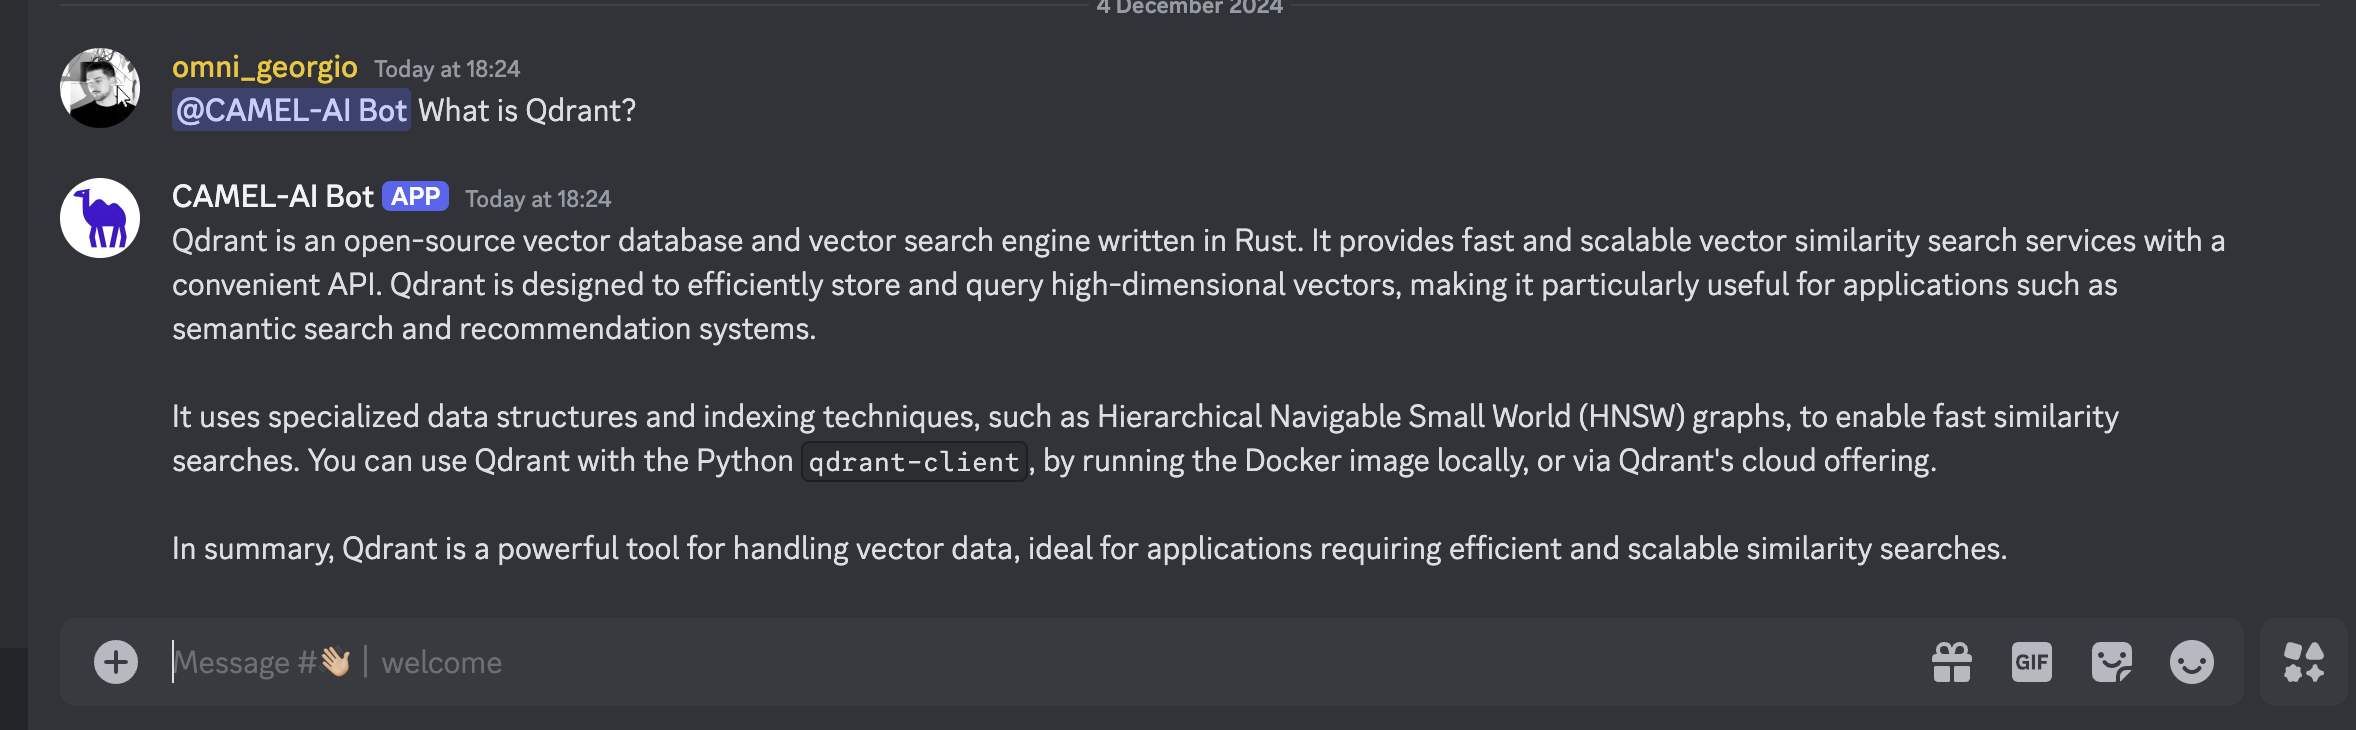

## Integrating Qdrant for Large Files to build a more powerful Discord bot

Qdrant is a vector similarity search engine and vector database. It is designed to perform fast and efficient similarity searches on large datasets of vectors. This enables the chatbot to access and utilize external information to provide more comprehensive and accurate responses. By storing knowledge as vectors, Qdrant enables efficient semantic search, allowing the chatbot to find relevant information based on the meaning of the user's query.

Set up an embedding model and retriever for Qdrant:

In [ ]:
from camel.embeddings import SentenceTransformerEncoder

sentence_encoder = SentenceTransformerEncoder(model_name='intfloat/e5-large-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2024-12-05 18:12:54.845321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 18:12:54.864069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 18:12:54.869936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 18:12:54.884872: I tensorflow/core/platform/cpu_feature_guard.cc:21

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Set up the AutoRetriever for automatically retrieving relevant information from a storage system.

In [ ]:
from camel.retrievers import AutoRetriever
from camel.types import StorageType

assistant_sys_msg = """You are a helpful assistant to answer question,
         I will give you the Original Query and Retrieved Context,
        answer the Original Query based on the Retrieved Context,
        if you can't answer the question just say I don't know."""
auto_retriever = AutoRetriever(
              vector_storage_local_path="local_data2/",
              storage_type=StorageType.QDRANT,
              embedding_model=sentence_encoder
            )
qdrant_agent = ChatAgent(system_message=assistant_sys_msg, model=model)

Use Auto RAG to retrieve first and then answer the user's query using CAMEL `ChatAgent` based on the retrieved info:

In [ ]:
from camel.bots import DiscordApp
import nest_asyncio
import discord

nest_asyncio.apply()
discord_q_bot = DiscordApp(token=discord_bot_token)

@discord_q_bot.client.event # triggers when a message is sent in the channel
async def on_message(message: discord.Message):
    if message.author == discord_q_bot.client.user:
        return

    if message.type != discord.MessageType.default:
        return

    if message.author.bot:
        return
    user_input = message.content

    retrieved_info = auto_retriever.run_vector_retriever(
        query=user_input,
        contents=[
            "local_data/qdrant_overview.md",
        ],
        top_k=3,
        return_detailed_info=False,
        similarity_threshold=0.5
    )

    user_msg = str(retrieved_info)
    assistant_response = qdrant_agent.step(user_msg)
    response_content = assistant_response.msgs[0].content

    if len(response_content) > 2000: # discord message length limit
        for chunk in [response_content[i:i+2000] for i in range(0, len(response_content), 2000)]:
            await message.channel.send(chunk)
    else:
        await message.channel.send(response_content)

discord_q_bot.run()

2024-12-05 18:13:16 INFO     discord.client logging in using static token
2024-12-05 18:13:16 INFO     discord.client logging in using static token
INFO:discord.client:logging in using static token
2024-12-05 18:13:17 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 05c4332a395af2dfb6c69abf8779a92a).
2024-12-05 18:13:17 INFO     discord.gateway Shard ID None has connected to Gateway (Session ID: 05c4332a395af2dfb6c69abf8779a92a).
INFO:discord.gateway:Shard ID None has connected to Gateway (Session ID: 05c4332a395af2dfb6c69abf8779a92a).


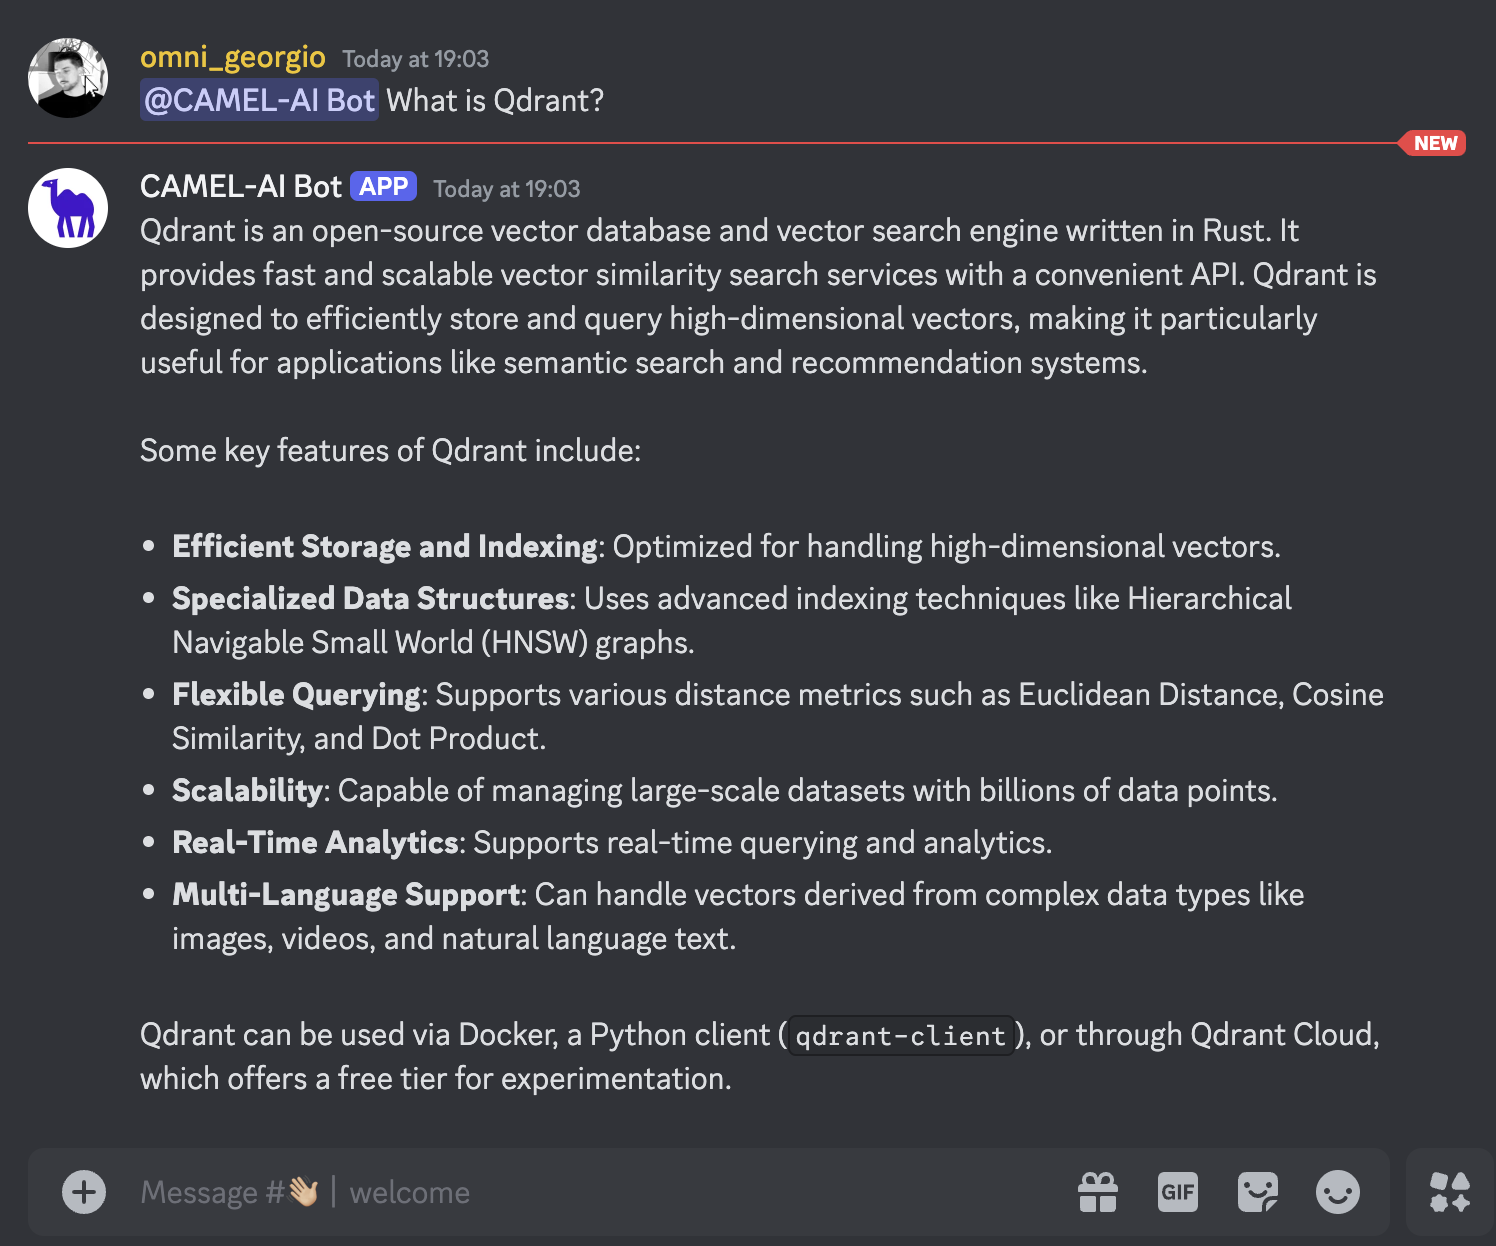

That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI

⭐ **Star the Repo**

If you find CAMEL useful or interesting, please consider giving it a star on our [CAMEL GitHub Repo](https://github.com/camel-ai/camel)! Your stars help others find this project and motivate us to continue improving it.